# Simple Linear Regression. Minimal example

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


## Create the target we will aim at

In [3]:
# targets = f(x,z) = 2*x - 3*z + 5 + noise
# Note: 2* and 3* as W1 and W2 and 5 is the bias and the noise is to randomize the data

noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


## Plot the training data

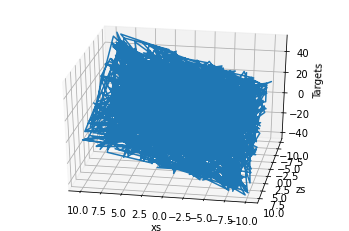

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim = 100)
plt.show()
targets = targets.reshape(observations,1)

## Initialize variables

In [5]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

baises = np.random.uniform(-init_range, init_range, size = 1)

print(weights)
print(baises)

[[ 0.09658004]
 [-0.02207238]]
[-0.08284705]


## Set a learning rate

In [6]:
# Alteration to the learning rate can be done to see the speed of optimization

learning_rate = 0.02

## Training the model

In [7]:
for i in range(100):
    outputs = np.dot(inputs, weights) + baises
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    baises = baises - learning_rate * np.sum(deltas_scaled)

213.6788732768371
38.21289852831737
15.311078354840323
11.967887091319744
11.149486160863743
10.67065033354209
10.250197102651384
9.851409424842045
9.469006890841985
9.101773655378684
8.7490380056758
8.410218595508029
8.084765236048778
7.772150501828583
7.471867909920387
7.183430974903782
6.9063724046776205
6.640243341340966
6.384612633739661
6.139066138931386
5.903206051235308
5.676650257753347
5.459031719315501
5.249997875845972
5.049210075186589
4.85634302445225
4.671084263029468
4.493133656364264
4.322202909719321
4.158015101112592
4.000304232680731
3.8488147997405124
3.703301376850035
3.5635282201991774
3.4292688856850715
3.3003058620538797
3.1764302185145343
3.0574412662535253
2.943146233302393
2.8333599522311452
2.7279045601616683
2.6266092106151255
2.5293097967264937
2.4358486853778287
2.346074461819546
2.259841684365983
2.1770106487677947
2.0974471618794936
2.021022324255427
1.947612321321984
1.8770982227877273
1.809365789966457
1.74430529070106
1.6818113215883275
1.6217826372

## Print weights and biases and see if we have worked correctly

In [8]:
print(weights,baises)

[[ 1.99189897]
 [-3.00422382]] [4.31861005]


## Plot last outputs vs targets

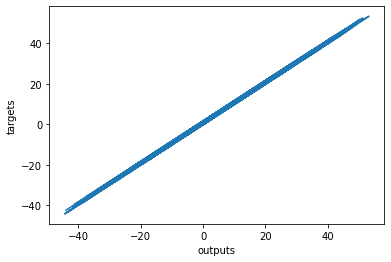

In [9]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()